In [82]:
# importing relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

In [2]:
# importing the dataset
df = pd.read_csv('Salaries.csv')
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [4]:
# checking a sample of the data
df.head(10)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
5,AssocProf,B,6,6,Male,97000
6,Prof,B,30,23,Male,175000
7,Prof,B,45,45,Male,147765
8,Prof,B,21,20,Male,119250
9,Prof,B,18,18,Female,129000


In [7]:
# checking the data types
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [8]:
# checking for null values
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [24]:
# seperating the nominal values for evaluation and pre-processing
df_nominal = df[['discipline', 'sex']].copy()
df_nominal.columns

Index(['discipline', 'sex'], dtype='object')

B    216
A    181
Name: discipline, dtype: int64


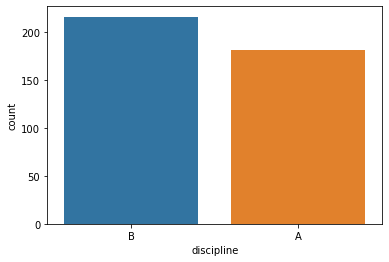

In [25]:
# visualization of the data to get insights
dx = sns.countplot(x='discipline',data=df_nominal)
print(df_nominal['discipline'].value_counts())

Male      358
Female     39
Name: sex, dtype: int64


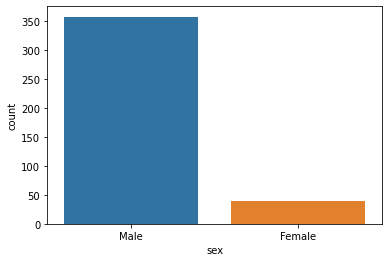

In [26]:
bx = sns.countplot(x='sex',data=df_nominal)
print(df_nominal['sex'].value_counts())

In [28]:
# ordinal feature
df_ordinal = df[['rank']].copy()
df_ordinal.columns

Index(['rank'], dtype='object')

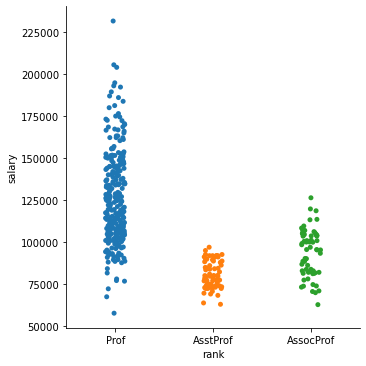

In [35]:
# visualization of the data to get insights
cx = sns.catplot(x='rank', y='salary',data=df)

In [37]:
# checking the distribution of continuous features
df_cont = df[['yrs.since.phd', 'yrs.service','salary']].copy()
df_cont.columns

Index(['yrs.since.phd', 'yrs.service', 'salary'], dtype='object')

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

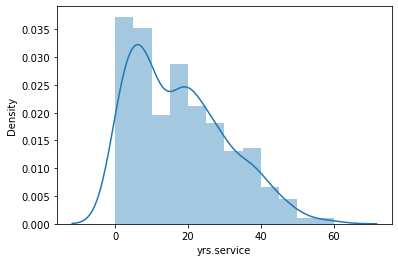

In [39]:
# visualizing the data
sns.distplot(df_cont['yrs.service'], kde=True)

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

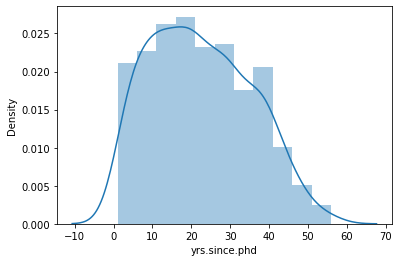

In [40]:
sns.distplot(df_cont['yrs.since.phd'], kde=True)

<AxesSubplot:xlabel='salary', ylabel='Density'>

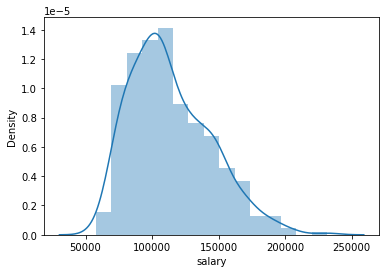

In [41]:
sns.distplot(df_cont['salary'], kde=True)

In [119]:
# applying logarithmic transformation
df['salary']=np.log(df['salary'])

<AxesSubplot:xlabel='salary', ylabel='Density'>

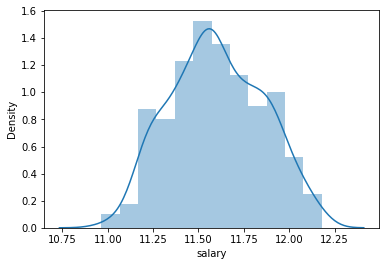

In [120]:
sns.distplot(df['salary'], kde=True)

In [121]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [122]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

In [123]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,11.847610
1,2.0,1.0,20,16,1.0,12.062202
2,1.0,1.0,4,3,1.0,11.286652
3,2.0,1.0,45,39,1.0,11.652687
4,2.0,1.0,40,41,1.0,11.860055
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,11.543513
393,2.0,0.0,31,19,1.0,11.922144
394,2.0,0.0,42,25,1.0,11.530156
395,2.0,0.0,25,15,1.0,11.465089


In [124]:
# check the statistical description
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,1.505076,0.545685,22.205584,17.525381,0.901015,11.602265
std,0.759151,0.498542,12.864764,12.940483,0.299021,0.254560
min,0.000000,0.000000,1.000000,0.000000,0.000000,10.964744
25%,1.000000,0.000000,12.000000,7.000000,1.000000,11.418615
50%,2.000000,1.000000,21.000000,16.000000,1.000000,11.582218
75%,2.000000,1.000000,31.750000,26.000000,1.000000,11.804475
max,2.000000,1.000000,56.000000,60.000000,1.000000,12.179729


<AxesSubplot:>

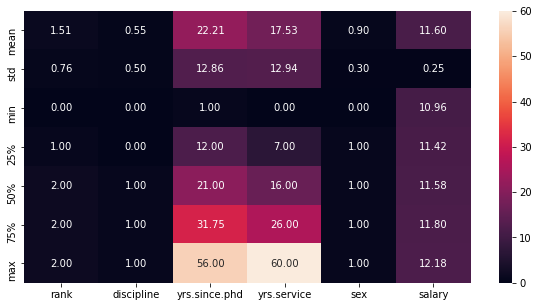

In [125]:
plt.figure(figsize=(10,5))
sns.heatmap(df.describe()[1:],annot=True,fmt='0.2f')

In [126]:
# checking the correlation with tthe target vssriable
df.corr()['salary'].sort_values()

sex              0.145022
discipline       0.186174
yrs.service      0.334120
yrs.since.phd    0.416463
rank             0.547333
salary           1.000000
Name: salary, dtype: float64

<AxesSubplot:>

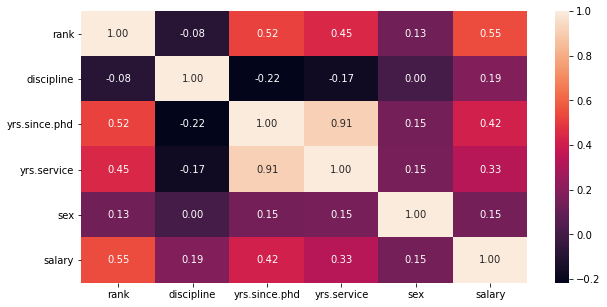

In [127]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,fmt='0.2f')

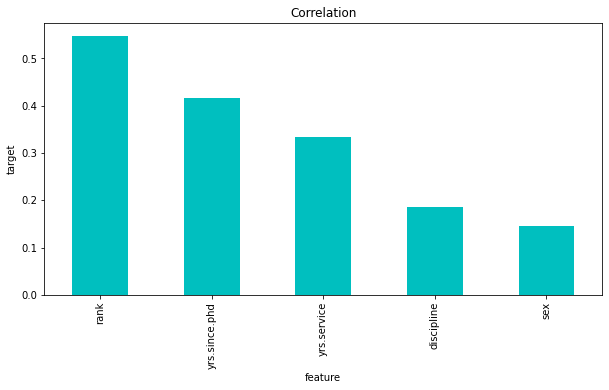

In [128]:
plt.figure(figsize=(10,5))
df.corr()['salary'].sort_values(ascending=False).drop(['salary']).plot(kind='bar', color='c')
plt.title('Correlation')
plt.xlabel('feature')
plt.ylabel('target')
plt.show()

In [129]:
df.skew().sort_values()

sex             -2.695870
rank            -1.139606
discipline      -0.184211
salary           0.073807
yrs.since.phd    0.314751
yrs.service      0.658470
dtype: float64

<AxesSubplot:>

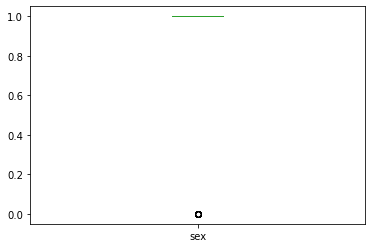

In [130]:
# checking for outliers
df['sex'].plot.box()

<AxesSubplot:>

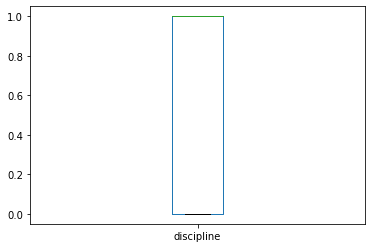

In [131]:
df['discipline'].plot.box()

<AxesSubplot:>

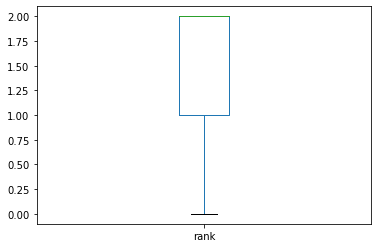

In [132]:
df['rank'].plot.box()

<AxesSubplot:>

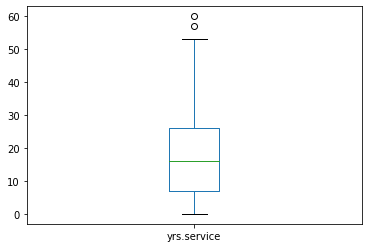

In [133]:
df['yrs.service'].plot.box()

<AxesSubplot:>

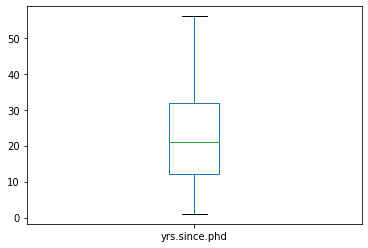

In [134]:
df['yrs.since.phd'].plot.box()

<AxesSubplot:>

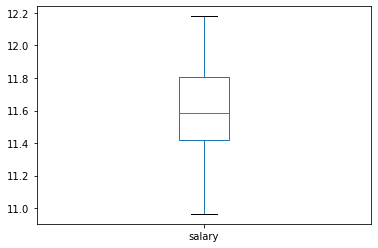

In [135]:
df['salary'].plot.box()

In [136]:
# dropping outliers
for x in ['salary']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [138]:
df = df.dropna(axis=0)

In [139]:
df.shape

(394, 6)

In [140]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
np.where(z>3)

(array([  9,  19,  24,  34,  35,  46,  47,  51,  62,  67,  83,  89, 102,
        113, 118, 122, 126, 130, 131, 132, 147, 152, 178, 185, 217, 229,
        230, 232, 236, 244, 251, 252, 272, 314, 321, 328, 330, 332, 339,
        356, 359], dtype=int64),
 array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4],
       dtype=int64))

In [155]:
# separating features
x = df.drop('salary', axis=1)
y = df['salary']

In [156]:
# Normalization
mms = MinMaxScaler()
lr = LinearRegression()

In [157]:
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is: {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is: {r2_score(y_test,pred_test)}")
    print('\n')

At random state 0, the training accuracy is: 0.41839102385828153
At random state 0, the testing accuracy is: 0.36599072390716414


At random state 1, the training accuracy is: 0.3992750598729028
At random state 1, the testing accuracy is: 0.4334627876859869


At random state 2, the training accuracy is: 0.40237543823485333
At random state 2, the testing accuracy is: 0.41628885721172726


At random state 3, the training accuracy is: 0.39419302909331244
At random state 3, the testing accuracy is: 0.4536138935106774


At random state 4, the training accuracy is: 0.4070306805472742
At random state 4, the testing accuracy is: 0.40531336130924833


At random state 5, the training accuracy is: 0.4431043208833373
At random state 5, the testing accuracy is: 0.26759838594325525


At random state 6, the training accuracy is: 0.40683389074015375
At random state 6, the testing accuracy is: 0.40304521478738564


At random state 7, the training accuracy is: 0.40929842112458803
At random state 7, the 

At random state 81, the training accuracy is: 0.39776329345489336
At random state 81, the testing accuracy is: 0.43472959742321016


At random state 82, the training accuracy is: 0.40217604498526127
At random state 82, the testing accuracy is: 0.432492271918527


At random state 83, the training accuracy is: 0.4171930768424357
At random state 83, the testing accuracy is: 0.37016194447273865


At random state 84, the training accuracy is: 0.40692952577193986
At random state 84, the testing accuracy is: 0.39513213243536127


At random state 85, the training accuracy is: 0.40972063344345455
At random state 85, the testing accuracy is: 0.3964486942860953


At random state 86, the training accuracy is: 0.40233521900514735
At random state 86, the testing accuracy is: 0.42838010480772337


At random state 87, the training accuracy is: 0.40987309162882424
At random state 87, the testing accuracy is: 0.3582362221738865


At random state 88, the training accuracy is: 0.4050209164002432
At random

In [158]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [159]:
lr.fit(x_train, y_train)

LinearRegression()

In [160]:
pred_test = lr.predict(x_test)

In [161]:
print(r2_score(y_test, pred_test))

0.42452154035867384


In [162]:
# cross validation
train_accuracy = r2_score(y_train,pred_train)
test_accuracy = r2_score(y_test,pred_test)
for i in range(2,10):
    cv_score = cross_val_score(lr,x,y, cv=i)
    cv_mean = cv_score.mean()
    print(f'At cross fold {i}, cv score is {cv_mean} and accuracy score for training is {train_accuracy} and accuracy score for testing is {test_accuracy}')
    print('\n')

At cross fold 2, cv score is 0.3665071969721237 and accuracy score for training is -0.4001372683727704 and accuracy score for testing is 0.42452154035867384


At cross fold 3, cv score is 0.34181227520087737 and accuracy score for training is -0.4001372683727704 and accuracy score for testing is 0.42452154035867384


At cross fold 4, cv score is 0.3528438285100078 and accuracy score for training is -0.4001372683727704 and accuracy score for testing is 0.42452154035867384


At cross fold 5, cv score is 0.3209609810936954 and accuracy score for training is -0.4001372683727704 and accuracy score for testing is 0.42452154035867384


At cross fold 6, cv score is 0.357893188588702 and accuracy score for training is -0.4001372683727704 and accuracy score for testing is 0.42452154035867384


At cross fold 7, cv score is 0.3466997458604929 and accuracy score for training is -0.4001372683727704 and accuracy score for testing is 0.42452154035867384


At cross fold 8, cv score is 0.357295953351439

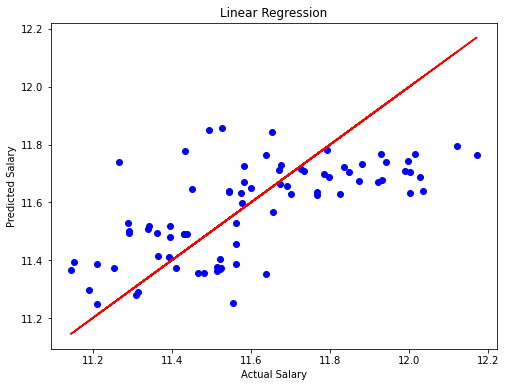

In [163]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='b')
plt.plot(y_test,y_test, color='r')
plt.title('Linear Regression')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()

In [164]:
# Regularization
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters = {'alpha':[.0001,.001,.01,.1,1,10],
             'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [165]:
ls = Lasso(alpha=0.0001, random_state=0)
ls.fit(x_train,y_train)
ls_score_training = ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)
ls_score_training*100

40.38973222012484

In [166]:
lss = r2_score(y_test,pred_ls)
lss*100

42.45838468659372

In [167]:
from sklearn.ensemble import RandomForestRegressor
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2']}
rf = RandomForestRegressor()
clf = GridSearchCV(rf, parameters)
clf.fit(x_train, y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt'}


In [168]:
rf = RandomForestRegressor(criterion='mae', max_features='sqrt')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_dec = rf.predict(x_test)

rfs = r2_score(y_test, pred_dec)
print(rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc = rfscore.mean()
print(rfc*100)

61.01907178346123
35.45260774221798
